<a href="https://colab.research.google.com/github/Chris-Congleton/MSc-Thesis/blob/main/ReverbChannelTestData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json, os
import pandas as pd
import nltk
import glob
import matplotlib.pyplot as plt
import datetime
from tqdm import tqdm
nltk.download('punkt')
import seaborn as sns
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
path_ftm = 'gdrive/MyDrive/CS/Thesis/rc_testdata/ftm-nl.article-cleansed-1000-articles.json'
path_joop = 'gdrive/MyDrive/CS/Thesis/rc_testdata/joop-bnnvara-nl.article-cleansed-1000-articles.json'
path_nos = 'gdrive/MyDrive/CS/Thesis/rc_testdata/nos-nl.article-cleansed-1000-articles.json'
path_nu = 'gdrive/MyDrive/CS/Thesis/rc_testdata/nu-nl.article-cleansed-1000-articles.json'
path_volkskrant = 'gdrive/MyDrive/CS/Thesis/rc_testdata/volkskrant-nl.article-cleansed-1000-articles.json'

In [ ]:
df_ftm = pd.read_json(path_ftm)
df_joop = pd.read_json(path_joop)
df_nos = pd.read_json(path_nos)
df_nu = pd.read_json(path_nu)
df_volkskrant = pd.read_json(path_volkskrant)

In [ ]:
df_ftm.head()

,categories,cleaned,cleantext,html_raw,id,keywords,leading-image,leading-image-caption-content,leading-image-caption-source,leading-image-copyright,og-description,og-image,og-title,page_json,structure,timestamp,title,url
0,NaN,2019-10-30T10:03:54.447000,Stefan Vermeulen Sinds de eerste schermutselin...,NaN,5711,"[Friesland, bank]",https://www.ftm.nl/wp-content/page_1414_13167_...,NaN,NaN,NaN,Sinds de eerste schermutselingen zit FTM boven...,https://www.ftm.nl/wp-content/page_1414_13167_...,De Ritmancollectie: hoe ging het mis?,NaN,NaN,2011-04-20 06:00:00,De Ritmancollectie: hoe ging het mis?,https://www.ftm.nl/artikelen/reconstructie-de-...
1,NaN,2019-10-30T10:07:13.320000,Redactie John de Mol slaat toe en neemt samen ...,NaN,5709,"[John, de, Mol]",https://www.ftm.nl/wp-content/page_1416_13191_...,NaN,NaN,NaN,John de Mol slaat toe en neemt samen met het F...,https://www.ftm.nl/wp-content/page_1416_13191_...,Berlusconi aan de Amstel,NaN,NaN,2011-04-20 07:01:00,Berlusconi aan de Amstel,https://www.ftm.nl/artikelen/berlusconi-aan-de...
2,NaN,2019-10-30T10:07:13.587000,Redactie 'De Europese Centrale Bank en het IMF...,NaN,5708,[Crisis],https://www.ftm.nl/wp-content/page_1417_13199_...,NaN,NaN,NaN,,https://www.ftm.nl/wp-content/page_1417_13199_...,Irish bail out revisited,NaN,NaN,2011-04-20 08:21:00,Irish bail out revisited,https://www.ftm.nl/artikelen/ierse-redding-spe...
3,NaN,2019-10-30T10:07:13.612000,Redactie Woekerpolisslachtoffers in de kou CDA...,NaN,5707,[Woekerpolisaffaire],https://www.ftm.nl/wp-content/page_1418_13208_...,NaN,NaN,NaN,Woekerpolisslachtoffers in de kou,https://www.ftm.nl/wp-content/page_1418_13208_...,CDA kiest toch kant verzekeraars,NaN,NaN,2011-04-20 08:28:00,CDA kiest toch kant verzekeraars,https://www.ftm.nl/artikelen/cda-kiest-toch-ka...
4,NaN,2019-10-30T10:07:13.627000,Stefan Vermeulen Terwijl de voetbalwereld smul...,NaN,5706,[Voetbal],https://www.ftm.nl/wp-content/page_1419_13217_...,NaN,NaN,NaN,"Terwijl de voetbalwereld smult van El Clásico,...",https://www.ftm.nl/wp-content/page_1419_13217_...,Dehaene: einde aan megaschulden clubs,NaN,NaN,2011-04-20 09:25:00,Dehaene: einde aan megaschulden clubs,https://www.ftm.nl/artikelen/jean-luc-dehaene-...


In [ ]:
def temporal_vis(frame):
  frame["date"] = frame.timestamp.dt.date
  time = pd.DataFrame({'count':frame.groupby(["date"]).size()}).reset_index()
  time["moving_average"] = time["count"]
  f, axs = plt.subplots(1,figsize=(50, 25))
  sns.lineplot(data=time, x='date',y="moving_average")
  axs.set_title("Number of articles")

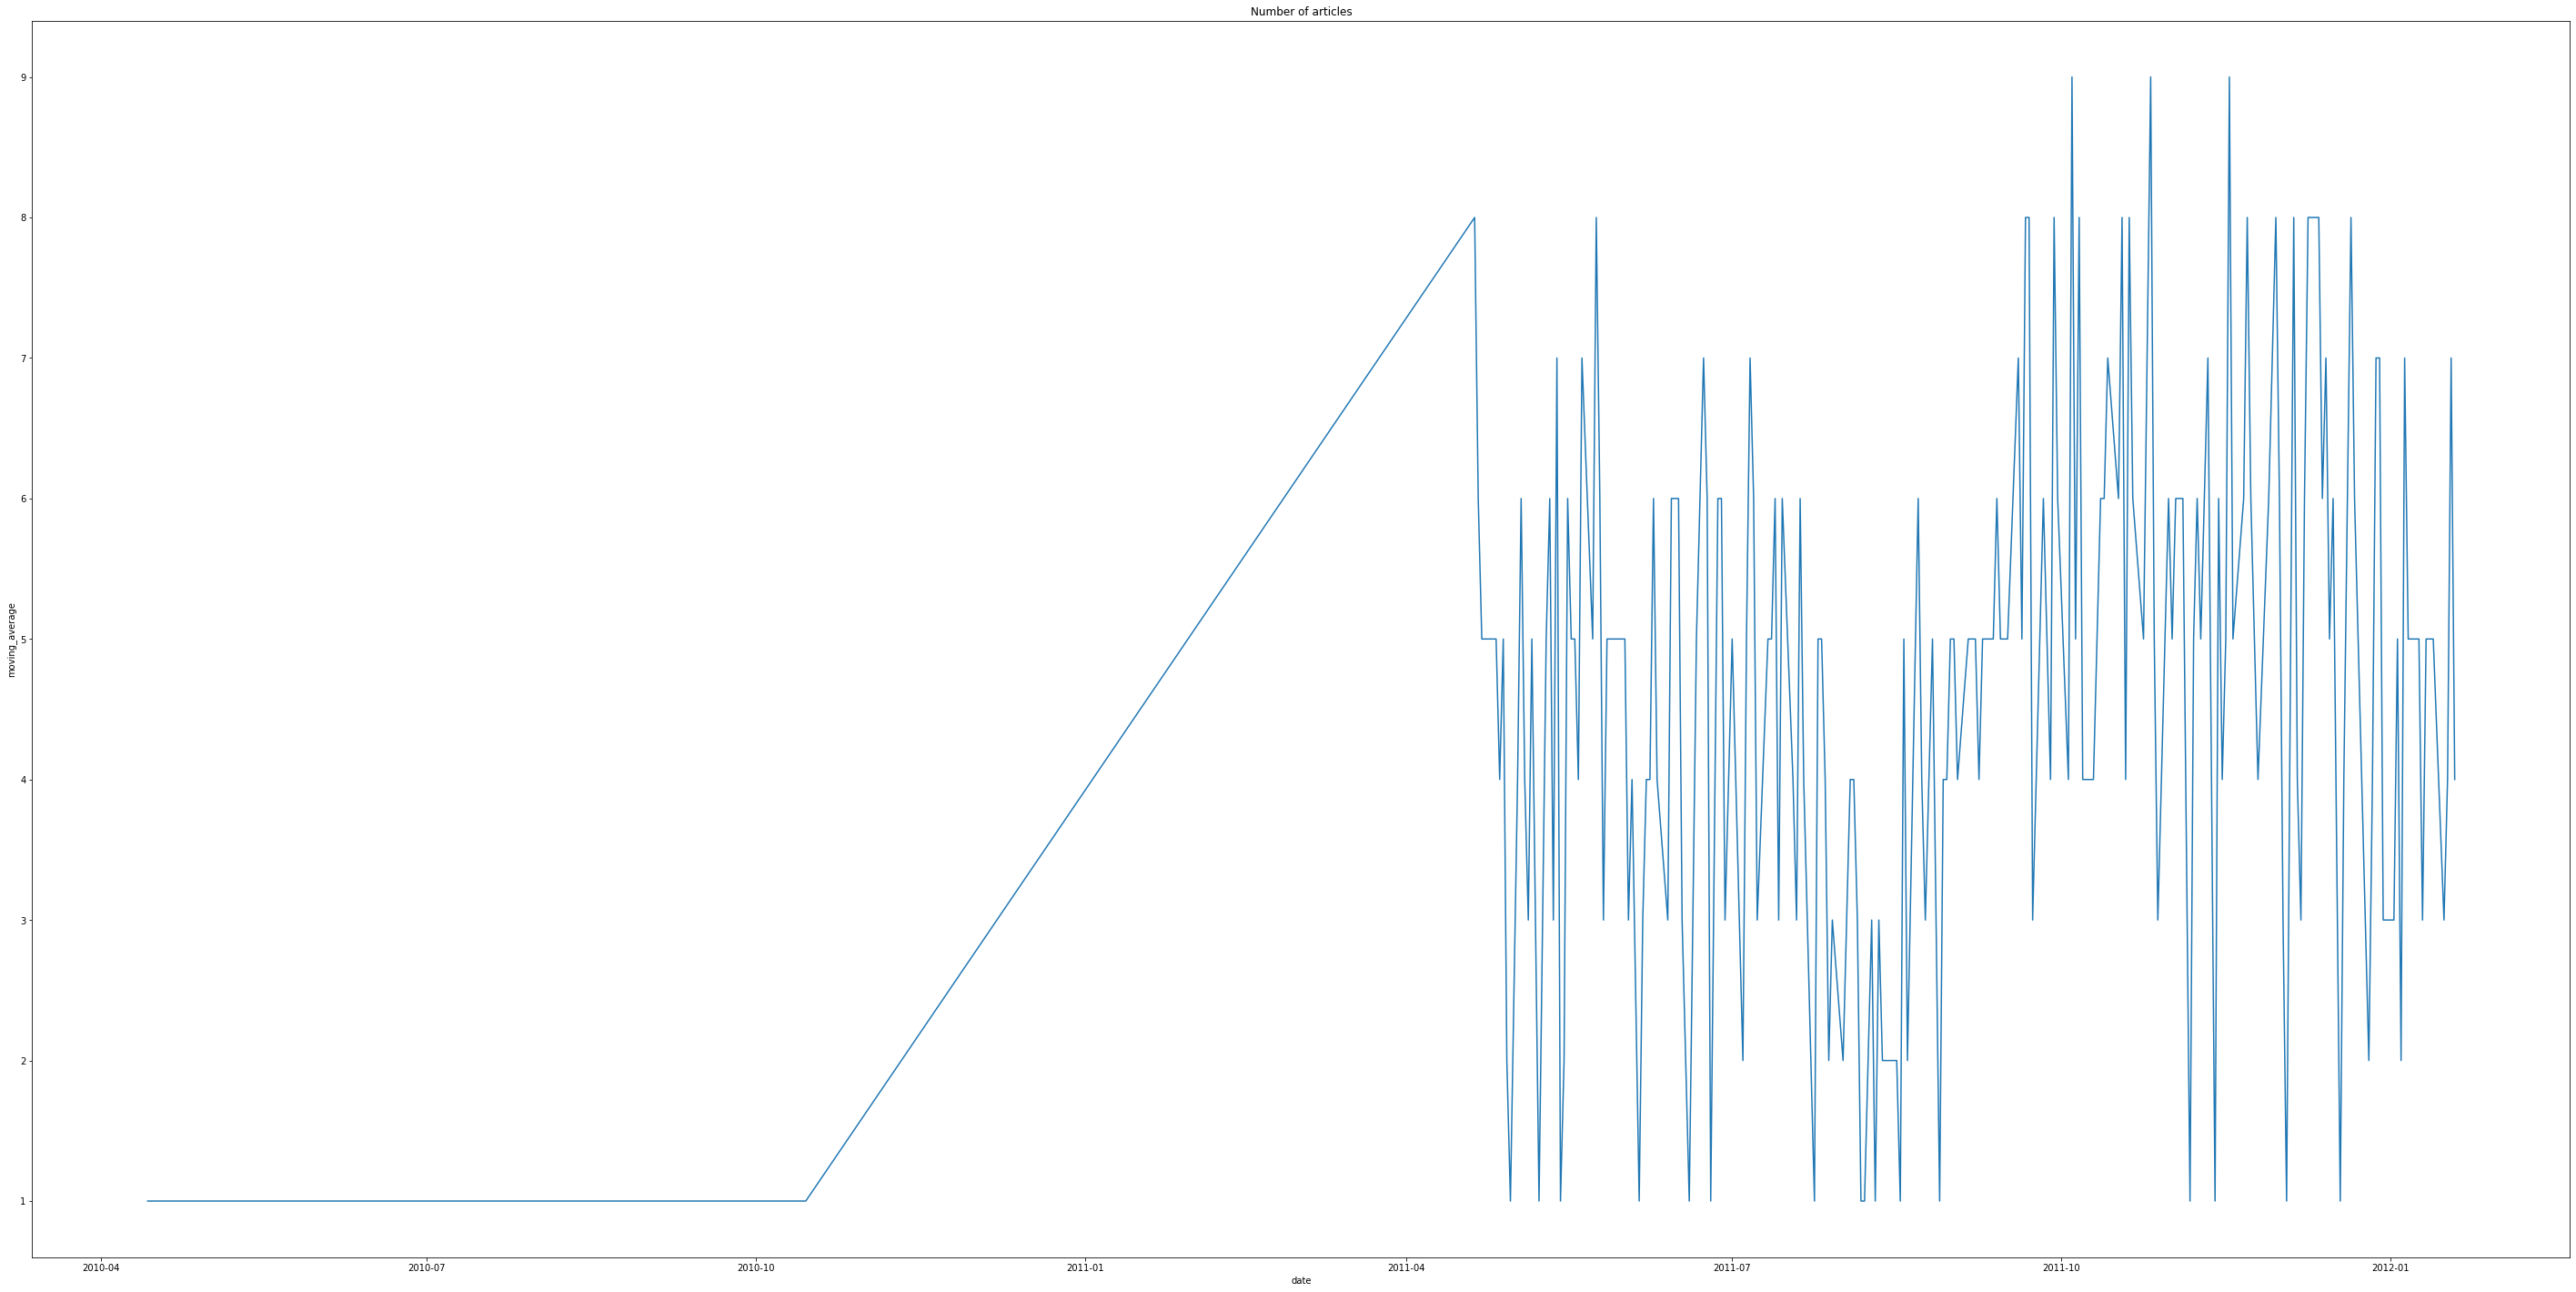

In [ ]:
temporal_vis(df_ftm)

In [ ]:
df_ftm["Bron"] = "Follow The Money"
df_joop["Bron"] = "Joop"
df_nos["Bron"] = "NOS"
df_nu["Bron"] = "Nu"
df_volkskrant["Bron"] = "Volkskrant"

dfs = [df_joop, df_ftm, df_nos, df_nu, df_volkskrant]
df_all = pd.concat(dfs, ignore_index=True)

df_all

,categories,cleaned,cleantext,id,keywords,leading-image,leading-image-caption-content,leading-image-caption-source,leading-image-copyright,og-description,og-image,og-title,structure,timestamp,title,url,Bron,html_raw,page_json,week,date,Krant
0,Video,2019-04-21T11:10:19.878000,Hoe staat Europa ervoor na w&eacute;&eacute;r ...,159241,"[Brexit, Buitenhof, Europa, Europese Unie, Fra...",NaN,,,,Hoe staat Europa ervoor na w&eacute;&eacute;r ...,https://joop.bnnvara.nl/content/uploads/2019/0...,Frans Timmermans: de staat van Europa na weer ...,"\n\t\t<p>Hoe staat Europa ervoor na <a href=""h...",2019-04-14 13:51:58,Frans Timmermans: de staat van Europa na weer ...,https://joop.bnnvara.nl/videos/frans-timmerman...,Joop,NaN,NaN,<NA>,NaN,NaN
1,Opinie,2019-04-21T11:10:19.381000,In Frankrijk is ophef ontstaan rond kritiek op...,159237,"[Frankrijk, Hervé di Rosa, Kunst, Racisme, Ste...",NaN,,,,Niemand mag in een vrije maatschappij de macht...,https://joop.bnnvara.nl/content/uploads/2019/0...,Opinie Han van der Horst: Zijn die werken van ...,\n \n\t\t<p>In Frankrijk is ophef ontst...,2019-04-14 12:41:28,Zijn die werken van Hervé di Rosa wel zo racis...,https://joop.bnnvara.nl/opinies/zijn-die-werke...,Joop,NaN,NaN,<NA>,NaN,NaN
2,Nieuws,2019-04-21T11:10:18.678000,Twee Franse academici zijn een petitie begonne...,159213,"[Afrika, Frankrijk, Kolonialisme, Racisme]",NaN,,,,Twee Franse academici zijn een petitie begonne...,https://joop.bnnvara.nl/content/uploads/2019/0...,Academici willen racistische muurschildering u...,\n ...,2019-04-14 09:56:04,Academici willen racistische muurschildering u...,https://joop.bnnvara.nl/nieuws/academici-wille...,Joop,NaN,NaN,<NA>,NaN,NaN
3,Opinie,2019-04-21T11:10:17.576000,Foto: ANP | Sander Koning Het was afgelopen ma...,159230,"[Forum voor Democratie, GroenLinks, Jesse Klav...",NaN,,,,GroenLinks moet oppassen dat ze niet voor lang...,https://joop.bnnvara.nl/content/uploads/2019/0...,Opinie Joost van Spanje: Weglopen van de wegloper,"\n \n\t\t<figure id=""attachment_159231""...",2019-04-14 09:12:48,Weglopen van de wegloper,https://joop.bnnvara.nl/opinies/weglopen-van-d...,Joop,NaN,NaN,<NA>,NaN,NaN
4,Nieuws,2019-04-21T11:10:16.926000,Op 2 april 2019 was de opening van de Vrijheid...,159226,"[Jonathan Holslag, Vrijheid, Vrijheidscolleges]",NaN,,,,Op 2 april 2019 was de opening van de Vrijheid...,https://joop.bnnvara.nl/content/uploads/2019/0...,Vrijheidscollege Jonathan Holslag: &#039;Strij...,\n ...,2019-04-14 09:01:51,Vrijheidscollege Jonathan Holslag: &#8216;Stri...,https://joop.bnnvara.nl/nieuws/vrijheidscolleg...,Joop,NaN,NaN,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,Sport,2019-10-16T20:19:43.138000,Liverpool-verdediger Virgil van Dijk Beeld Get...,b8167b8c,"[Virgil van Dijk, sport, sportdiscipline, voet...",https://images1.persgroep.net/rcs/kdKvpwPj2ch-...,Liverpool-verdediger Virgil van Dijk,Beeld Getty Images,Beeld Getty Images,Virgil van Dijk (28) kan maandagavond tijdens ...,https://images1.persgroep.net/rcs/kdKvpwPj2ch-...,‘Ik weet bijna zeker dat Virgil van Dijk vanav...,get it from url index blin,2019-09-23 12:44:12,‘Ik weet bijna zeker dat Virgil van Dijk vanav...,https://www.volkskrant.nl/sport/ik-weet-bijna-...,Volkskrant,NaN,"{""@context"":""http://schema.org/"",""@type"":""News...",<NA>,NaN,Volkskrant
4991,Sport,2019-10-16T20:19:43.489000,Is Virgil van Dijk behalve de beste voetballer...,ba54df3e,"[Virgil van Dijk, sportdiscipline, voetbal, sp...",https://images3.persgroep.net/rcs/gY0MSYoxTabm...,None,None,None,Is Virgil van Dijk behalve de beste voetballer...,https://images3.persgroep.net/rcs/jeYy6fxY4W2S...,"Superverdediger, doelpuntenmaker, uitmuntende ...",get it from url index blin,2019-09-23 13:00:00,"Superverdediger, doelpuntenmaker, uitmuntende ...",https://www.volkskrant.nl/sport/superverdedige...,Volkskrant,NaN,"{""@context"":""http://schema.org/"",""@type"":""News...",<NA>,NaN,Volkskrant
4992,Cultuur &amp; Media,2019-

In [ ]:
def count_source_vis(frame, term, title="Title"):
  frame[term] = frame.cleantext.str.count(term)
  frame[term] = frame.groupby(["date","Bron"])[term].agg("sum")

  frame = frame.reset_index()
  frame = frame.melt(["date", "Bron"])
  frame = frame.rename(columns={'date':'Date','value':'Frequency', "variable":"Term"})
  print(frame.head())
  # # bigger plot elements suitable for giving talks
  # sns.set_context("talk")
  # # set figure size
  # plt.figure(figsize=(9,6))
  # # Time series plot with Seaborn lineplot()
  # sns.lineplot(x="Date", y='Frequency', hue='Bron', 
  #             data=frame, ci=None)
  # # axis labels
  # plt.xlabel("Date", size=14)
  # plt.ylabel("Frequency", size=14)
  # plt.legend(title=title)

In [ ]:
count_source_vis(df_all, "Rutte", title="Rutte")

TypeError: ignored